In [2]:
from sklearn.preprocessing import LabelBinarizer
import keras, pickle, numpy as np
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Input, Activation, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [3]:
data_griewank = pickle.load(open("histogram_data/histogram-kmeans-mpl-es-griewank.out", "rb"))
data_rastrigin = pickle.load(open("histogram_data/histogram-kmeans-mpl-es-rastrigin.out", "rb"))
data_sphere = pickle.load(open("histogram_data/histogram-kmeans-mpl-es-sphere.out", "rb"))
data_ackley = pickle.load(open("histogram_data/histogram-kmeans-mpl-es-ackley.out", "rb"))

In [4]:
X, y = [], []

for a,b,c,d in zip(data_ackley, data_griewank, data_rastrigin, data_sphere):
    #X.append(a[0]), X.append(b[0]), X.append(c[0]), X.append(d[0])
    #X.append(a[1]), X.append(b[1]), X.append(c[1]), X.append(d[1])
    X.append(np.concatenate(a)), X.append(np.concatenate(b)), X.append(np.concatenate(c)), X.append(np.concatenate(d))
    y.append(0), y.append(1), y.append(2), y.append(3)

X_train, y_train = np.array(X), np.array(y)    
X_train, y_train = np.array(X[:3200]), np.array(y[:3200])
X_test, y_test = np.array(X[-800:]), np.array(y[-800:])

In [5]:
lb = LabelBinarizer()

Y_train = lb.fit_transform(y_train)
Y_train = lb.transform(y_train)
Y_test = lb.transform(y_test)

In [7]:
# Configuration options
input_vector_length = 200
num_classes = 4

#accs = []


# Create the model
# 200, 10, 50, 4
in_x = Input(shape=(input_vector_length,))
x = Dense(10, activation='relu')(in_x)
x = Dense(50, activation='relu')(x)
out_x = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=in_x, outputs=out_x)

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = model.fit(X_train, Y_train, epochs=1000, batch_size=250, verbose=0, validation_split=0.2)
# inter_output_model = Model(model.input, model.layers[1].output )
#accs.append(h.history['val_acc'][-1])

Instructions for updating:
Use tf.cast instead.


In [8]:
inter_output_model = Model(model.input, model.layers[1].output)

In [9]:
out = inter_output_model.predict(X_test)
out.shape

(800, 10)

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(out).T

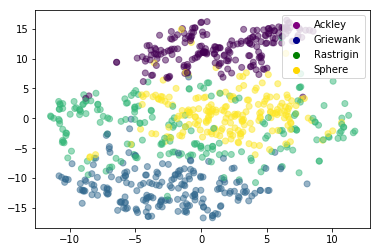

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x = tsne_pca_results

if (x.shape[0]==3):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*x, c=y_test, alpha=0.5)
else:
    labels = ['Ackley','Griewank','Rastrigin','Sphere']
    #colors = [0,1,2,3]
    colors = ['purple','darkblue','green','gold']
    for i,l in enumerate(labels):
        plt.scatter([],[], c=[colors[i]], alpha=1, label=l)
    plt.scatter(*x, c=[y for y in y_test], alpha=.5)
    plt.legend(loc='upper right')
    plt.show()

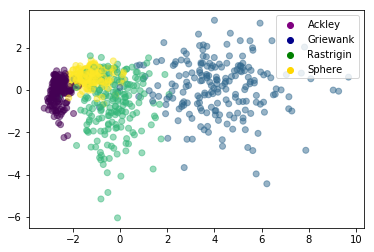

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda_x = lda.fit(out, y_test).transform(out).T

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#plt.figure(figsize=(5, 5))
for i,l in enumerate(labels):
    plt.scatter([],[], c=[colors[i]], alpha=1, label=l)
plt.scatter(*lda_x, c=[y for y in y_test], alpha=.5)
plt.legend(loc='upper right')
#plt.savefig('cluster-mlp.pdf')
plt.show()

In [14]:
# list all data in history
print(h.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


<Figure size 432x288 with 0 Axes>

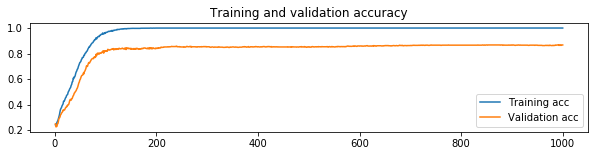

<Figure size 432x288 with 0 Axes>

In [15]:
acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 2))
plt.plot(epochs, acc, '-', label='Training acc')
plt.plot(epochs, val_acc, '-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
#plt.savefig('training-accuracy-mlp.pdf')
plt.figure()

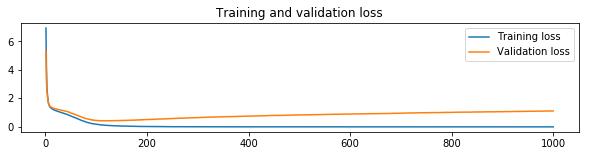

In [16]:
plt.figure(figsize=(10, 2))
plt.plot(epochs, loss, '-', label='Training loss')
plt.plot(epochs, val_loss, '-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
#plt.savefig('training-loss-mlp.pdf')
plt.show()